In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , RobustScaler

In [4]:
df = pd.read_csv("/Users/raghavan/Downloads/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check for null data

In [7]:
df.isnull().sum().max()

0

### Data is skewed

In [8]:
print ("No Frauds : " + str(round(df['Class'].value_counts()[0] * 100.00 /len(df),2)) + '% of the dataset')
print ("Frauds : " + str(round(df['Class'].value_counts()[1] * 100.00 /len(df),2)) + '% of the dataset')

No Frauds : 99.83% of the dataset
Frauds : 0.17% of the dataset


Text(0.5,1,'Class Distribution \n 0 : No Frauds | 1 : Frauds')

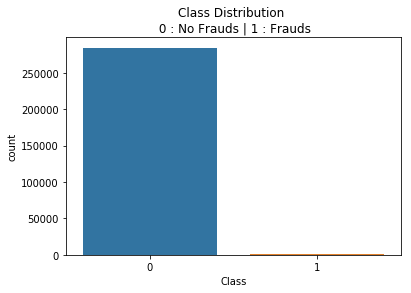

In [9]:
sns.countplot('Class',data=df)
plt.title("Class Distribution \n 0 : No Frauds | 1 : Frauds")

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.0, 172792.0)

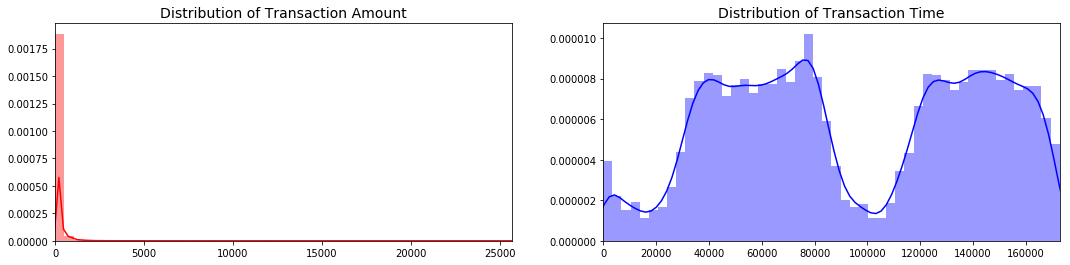

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

### We need to scale columns time and amount

In [11]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#df.drop(['Time','Amount'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

#Amount and Time are Scaled!

df.head()




,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.783274,-0.994983,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-0.269825,-0.994983,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,4.983721,-0.994972,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.418291,-0.994972,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.670579,-0.994960,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print ("No Frauds : " + str(round(df['Class'].value_counts()[0] * 100.00 /len(df),2)) + '% of the dataset')
print ("Frauds : " + str(round(df['Class'].value_counts()[1] * 100.00 /len(df),2)) + '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ float(len(original_ytrain)))
print(test_counts_label/ float(len(original_ytest)))

No Frauds : 99.83% of the dataset
Frauds : 0.17% of the dataset
('Train:', array([265518, 180305,  42664, ...,  29062,  13766,  17677]), 'Test:', array([263020,  11378, 147283, ..., 274532, 269819,  64170]))
('Train:', array([ 72227, 114282,  16818, ..., 264471, 191914, 284017]), 'Test:', array([202638,  32978, 128121, ..., 244024, 127667,  48318]))
('Train:', array([ 20895, 114622, 167683, ..., 244502, 178972, 218506]), 'Test:', array([284352,  82483,  90981, ..., 171224, 168807, 271602]))
('Train:', array([122248, 181660, 194400, ..., 104631, 277586,  29432]), 'Test:', array([225673,  63348,  68025, ..., 279451,  77554,  76043]))
('Train:', array([241684, 223467, 136928, ...,  86495, 160550,  49633]), 'Test:', array([157557, 204860,  83760, ..., 251478, 178967, 216850]))
----------------------------------------------------------------------------------------------------
Label Distributions: 

[ 0.99827075  0.00172925]
[ 0.99827955  0.00172045]


### Create equal sample for both the classes

In [26]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141553,-0.293440,-0.003618,84384.0,1.116927,-0.461121,0.888025,-0.944425,-0.736195,0.453454,-0.798884,...,0.101052,0.598304,0.006361,-0.249596,0.339024,-0.646365,0.126202,0.019375,1.00,0
76609,-0.202334,-0.329445,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,...,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52,1
205140,0.153706,0.598186,135609.0,2.153813,-1.073755,-2.668504,-1.883436,1.866248,3.256755,-0.923187,...,-0.021390,-0.157275,0.249601,0.707170,-0.044263,-0.309117,-0.016162,-0.063424,33.00,0
18773,-0.297911,-0.645438,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1
64460,1.089779,-0.394001,51155.0,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,...,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


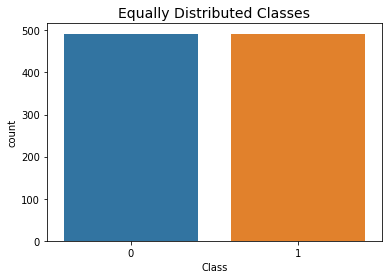

In [30]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()



### Correlation of features

Text(0.5,1,'Balanced Correlation Matrix ')

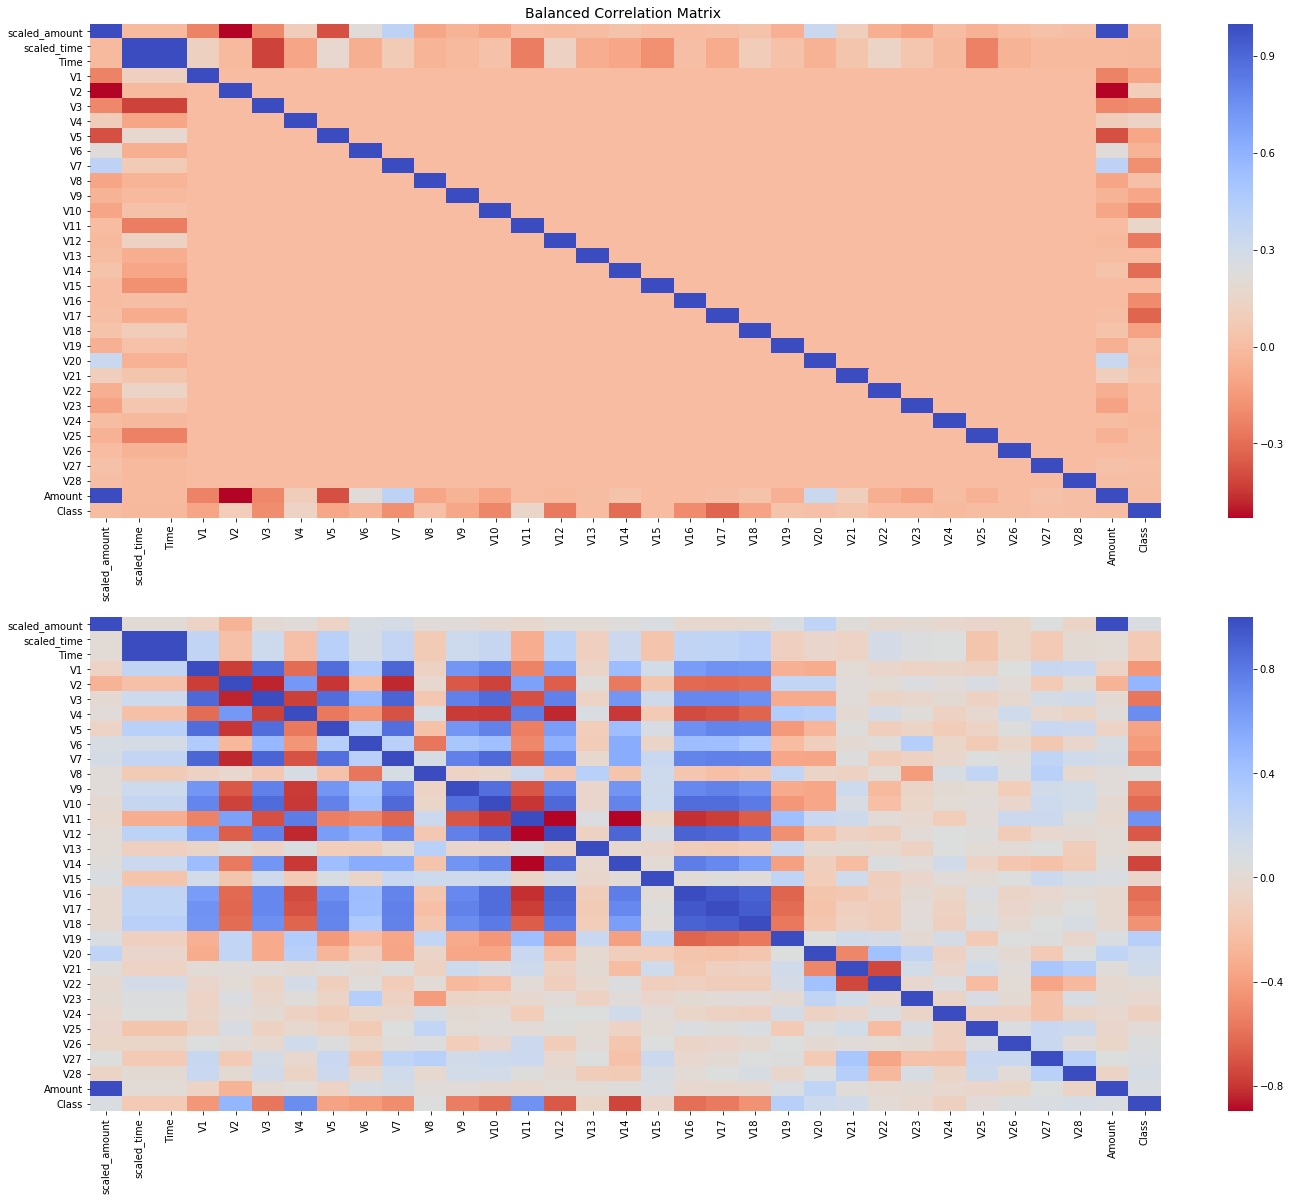

In [36]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix ", fontsize=14)

corr1 = new_df.corr()
sns.heatmap(corr1, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax1.set_title("Balanced Correlation Matrix ", fontsize=14)

* Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

* Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. 

### Negative correlated columns distributions

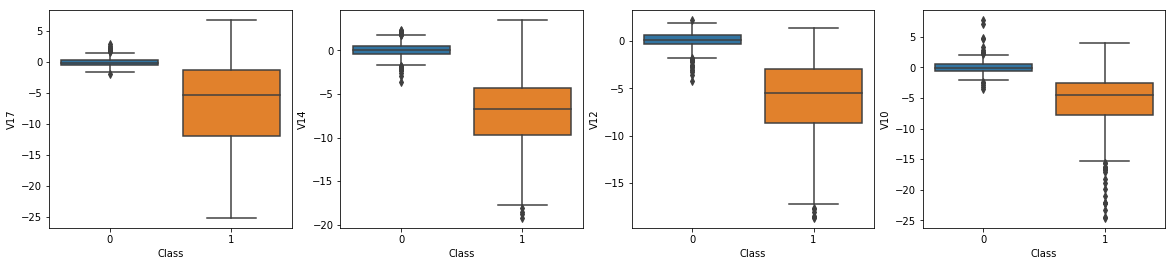

In [50]:
fig2 , axes = plt.subplots(ncols=4,nrows=1,figsize=(20,4))
negative_columns = ['V17', 'V14', 'V12' ,'V10']
indies = np.arange(0,4)

for i,col in zip(indies,negative_columns):
    sns.boxplot(ax=axes[i],x='Class',y=col,data=new_df)


### Positive corerelated columns distributions

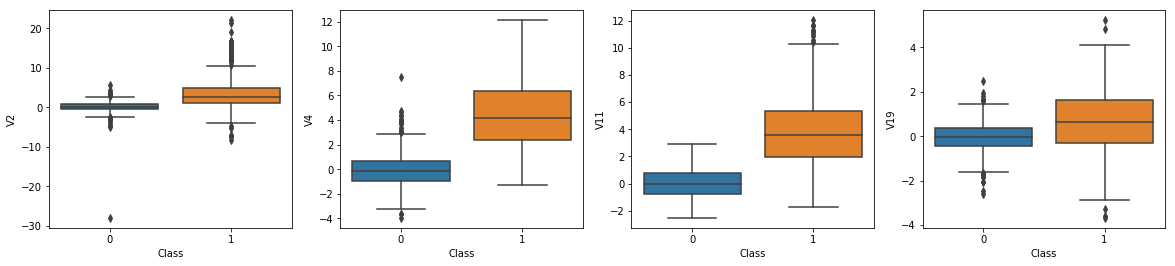

In [51]:
fig3 , axes = plt.subplots(ncols=4,nrows=1,figsize=(20,4))
positive_columns = ["V2", "V4", "V11","V19"]
indies = np.arange(0,4)

for i , col in zip(indies,positive_columns):
    sns.boxplot(ax=axes[i],x='Class',y=col,data=new_df)